Fig6a, action potential for selected ra

In [1]:
from neuron import h
import numpy as np
import os.path
import sys
sys.path.append('../../libs/')

In [2]:
# compile neuron channels
!cd ../../data/morphology && nrnivmodl && cd -

/home/maja/maja/phdProject/Brette Lab/Model DB/kink_paper/data/morphology
Gfluct.mod NMDA_Mg.mod ca.mod caL3d.mod cad.mod capump.mod gabaa5.mod ia.mod iahp.mod iahp2.mod ih.mod im.mod kca.mod km.mod kv.mod na.mod nmda5.mod release.mod
Gfluct.mod NMDA_Mg.mod ca.mod caL3d.mod cad.mod capump.mod gabaa5.mod ia.mod iahp.mod iahp2.mod ih.mod im.mod kca.mod km.mod kv.mod na.mod nmda5.mod release.mod
"/home/maja/neuron/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/home/maja/neuron/nrn/include/nrn" -I"/home/maja/neuron/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/home/maja/neuron/nrn/include/nrn -I/home/maja/neuron/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/home/maja/neuron/nrn/share/nrn/libtool" --tag=CC --mode=link mpicc -module  -g -O2    -o libnrnmech.la -rpath "/home/maja/neuron/nrn/x86_64/lib"  Gfluct.lo NMDA_Mg.lo ca.lo caL3d.lo cad.lo capump.lo gabaa5.lo ia.l

In [3]:
# load model
# works only on linux
model = '../../data/morphology/soma_axon.hoc'
dllpath = '../../data/morphology/x86_64/.libs/libnrnmech.so'
h.nrn_load_dll(dllpath)
h.load_file(model)
h.init_cell()

0.0

In [4]:
# parameters
keep_soma_Na = True
change_to_Ra = 1 # 30, 150, 250

# simulation
h.tstart = 0.
h.tstop = 20.
h.dt = 0.001
rm = 30000.
st_dur1 = 2.
st_dur2 = 3.
v_init = -70

# morphology 
h.soma.L = 30.
h.soma.diam = 20.
h.soma.nseg = 6
h.soma.g_pas = 1./rm
h.soma.cm = 0.75

h.axon.L = 50.
h.axon.diam =1.
h.axon.nseg = 10
h.axon.g_pas = 1./rm
h.axon.cm = 0.75 * 0.75

# general
h.rm = rm
h.v_init = v_init
h.ra = 150 
h.c_m = 0.75
h.xn = 1 

# potassium
h.Ek = -80. # mV # Fig2: = 80; Fig4b:
h.gk = 1600.
h.gkm = 0.3
h.soma.gbar_kv = 1600/5.
h.axon.gbar_kv = 1600.

# sodium
h.Ena = 60.
h.gna = 8000.
h.gkm_soma = 0.3
if keep_soma_Na:
    h.soma.gbar_na = 0.1*8000
else:
    h.soma.gbar_na = 0.
h.axon.gbar_na = 8000.
            
# calcium (set no calcium in the model)
h.gca = 0.
h.gkca = 0.
h.gca_soma = 0.
h.gkca_soma = 0.

# change Ra
h.axon.Ra = change_to_Ra
h.soma.Ra = change_to_Ra

In [5]:
# create I-clamp stimulation
st = h.IClamp(0.5, sec = h.soma)

# create ramp stimulation
st.delay=0
st.dur=1e9
st.amp =0
h.tstop = 30
ramp = np.zeros(h.tstop/h.dt) # ms
ramp_range = [0,h.tstop-0.5]
start_ramp_at = 0.5/h.dt
min_ramp = 0.0
max_ramp = 0.04
ramp[ramp_range[0]/h.dt+start_ramp_at:ramp_range[1]/h.dt+ start_ramp_at] = np.linspace(min_ramp,
                                                                            max_ramp,
                                                                            (ramp_range[1]/h.dt-ramp_range[0]/h.dt))
stim_vec = h.Vector(ramp)
stim_vec.play(st._ref_amp, h.dt)


/home/maja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/maja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.0

In [6]:
# record in the soma and in the axon end
vec_soma = h.Vector()
vec_soma.record(h.soma(0.5)._ref_v, sec=h.soma)
st_current = h.Vector()
st_current.record(st._ref_i)
h.run()

0.0

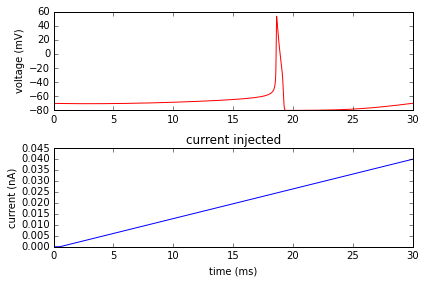

In [7]:
v_soma = np.array(vec_soma)
stim = np.array(st_current)
# plot the figure
import matplotlib.pylab as plt
%matplotlib inline
plt.subplot(2,1,1)
time = np.arange(len(v_soma))*h.dt
plt.plot(time, v_soma, 'r')
plt.ylabel('voltage (mV)')

plt.subplot(2,1,2)
deriv_soma = np.diff(v_soma)/h.dt
plt.plot(time, stim, 'b')
plt.ylabel('current (nA)')
plt.xlabel('time (ms)')
plt.title('current injected')
plt.tight_layout()